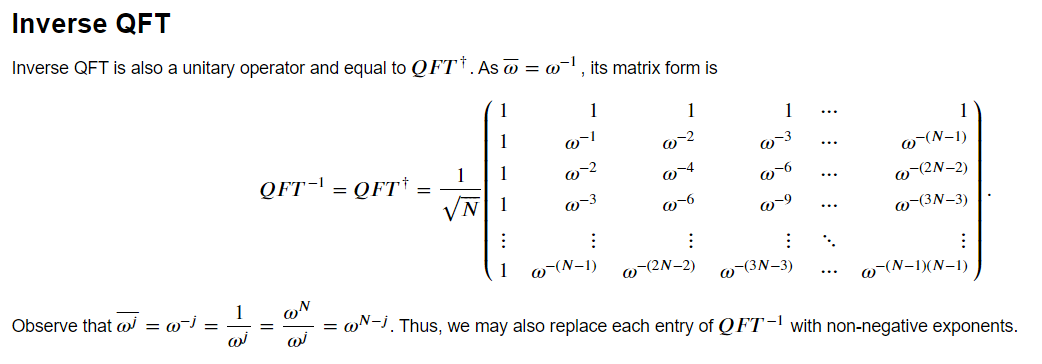

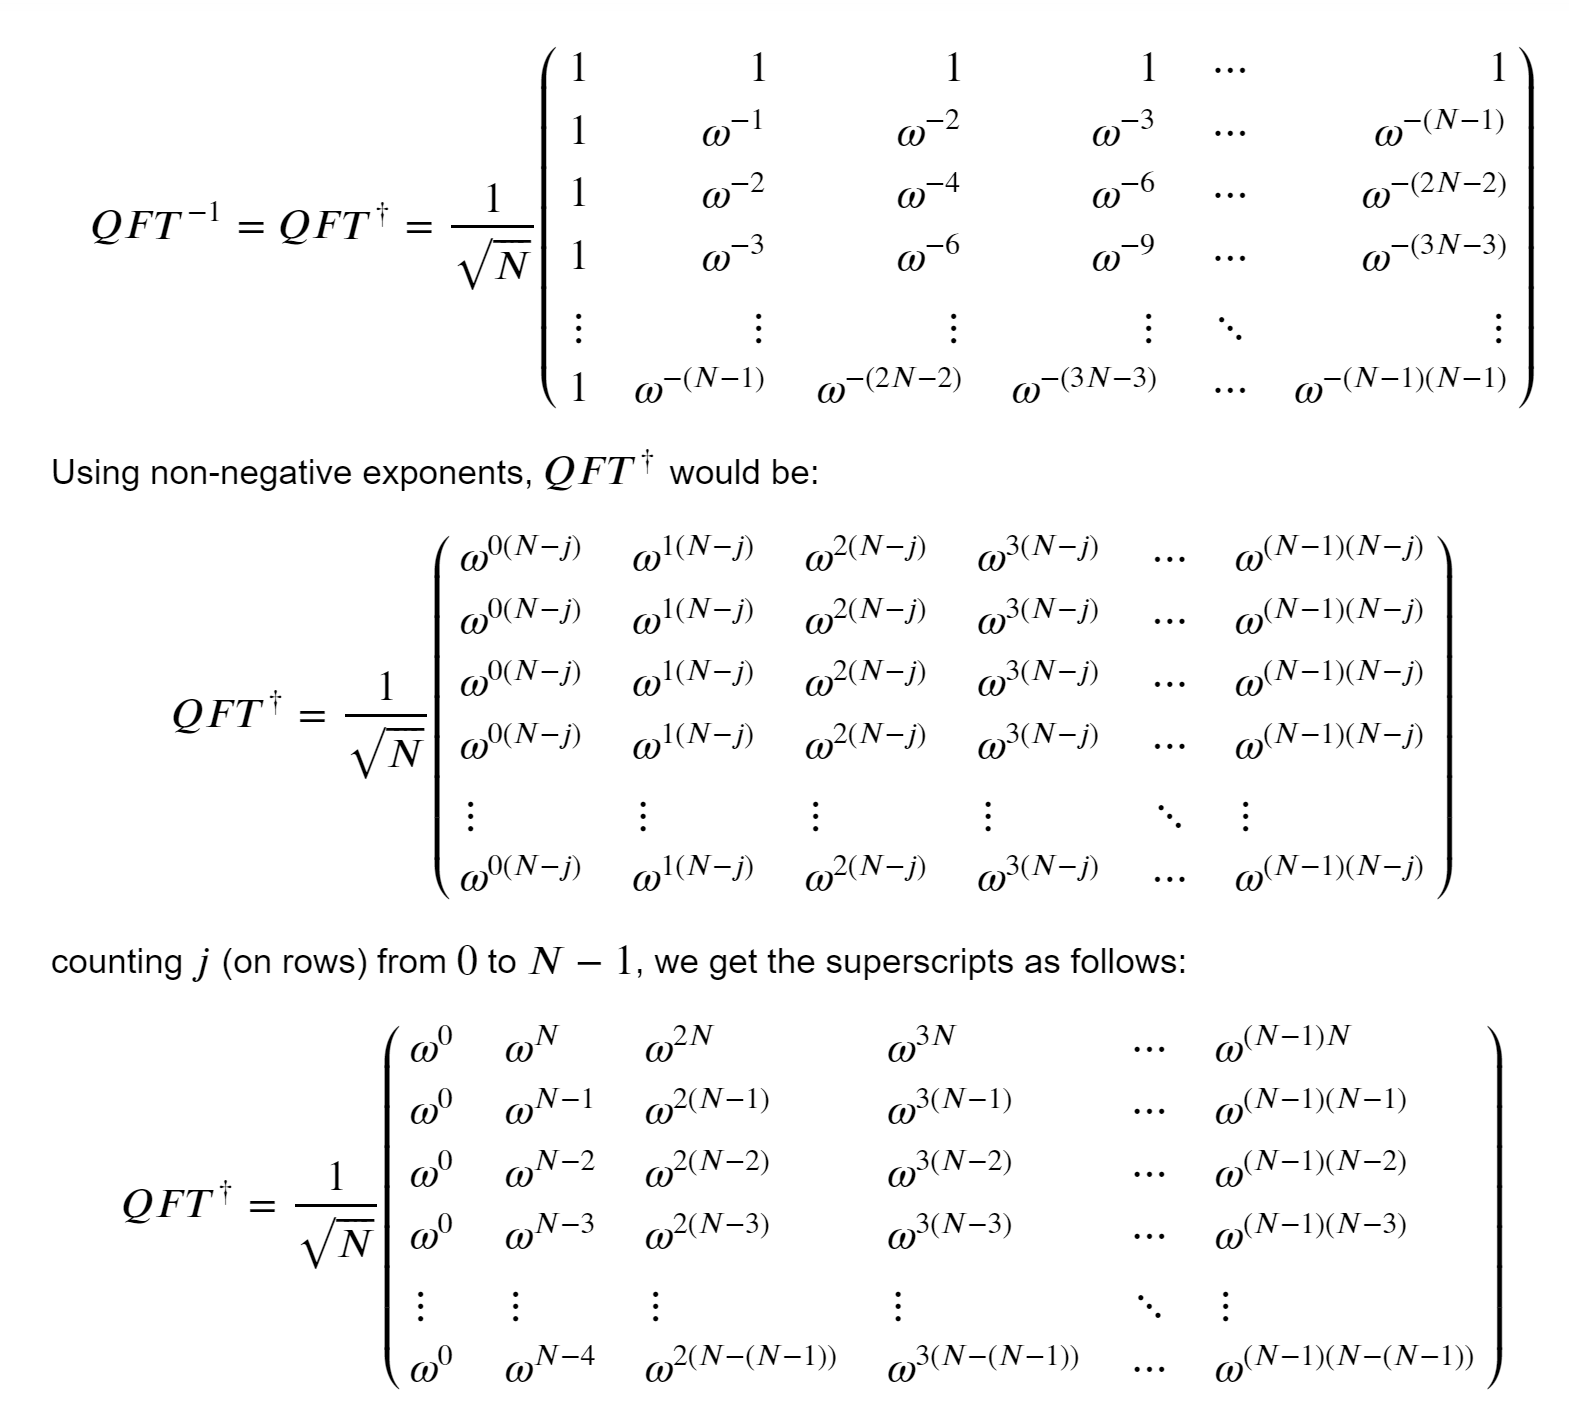

# 1. Render $QFT^{\dagger}$ Matrix:

### Display $QFT^{\dagger}$ Matrix: 

In [1]:
def iqft_render_nx(sv_entries_count): # With negative exponents
    import numpy as np 
    import cmath
    from IPython.display import display, Markdown
    print("Invrese QFT matrix (-ve exponents) for statevctor with ", sv_entries_count, " entries is:\n")
    
    N   = str(sv_entries_count)
    text = r"$QFT^{{\dagger}} = \frac{{1}}{{\sqrt{{{N}}}}} \begin{{bmatrix}}".format(N=N)
    
    ele = ''
    dim = sv_entries_count
    
    # Code for rendering loop 
    for i in range(dim): # row indexer = Table
        for j in range(dim): # column indexer
            exponent = -1 * i * j 
            if exponent == 0:
                ele = '1'
            elif exponent == 1:
                ele = '\omega'
            else:
                ele = '\omega^{'+str(exponent)+'}'
                
            if j == dim-1:
                text = text + r' ' + ele + r' \\'
            else:        
                text = text + r' ' + ele + r' &'
     # end of for   
    text = text + r' \end{bmatrix}$'
    display(Markdown(text))
    
    #return text
    

def iqft_render_px(sv_entries_count):  # With positive exponents
    import numpy as np 
    import cmath
    from IPython.display import display, Markdown
    print("Inverse QFT matrix (+ve exponents) for statevector with ", sv_entries_count, " entries is:\n")

    N    = str(sv_entries_count)
    text = r"$QFT^{{\dagger}} = \frac{{1}}{{\sqrt{{{N}}}}} \begin{{bmatrix}}".format(N=N)
    ele  = ''
    dim  = sv_entries_count
    
    # Code for rendering loop 
    for j in range(dim): # row indexer = Table   ### changed the name of index so matches with definition
        for i in range(dim): # column indexer
            exponent = i * (dim - j)
            if i == 0 or j == 0:
                ele = '1'
            else:
                ele = '\omega^{'+str(exponent)+'}'
                
            if i == dim-1:
                text = text + r' ' + ele + r' \\'
            else:        
                text = text + r' ' + ele + r' &'
     # end of for   
    text = text + r' \end{bmatrix}$'
    display(Markdown(text))    
    
    #return text
    

In [19]:
# Size of state vector 
sv_size = 4
iqft_render_nx(sv_size)
iqft_render_px(sv_size)


Invrese QFT matrix (-ve exponents) for statevctor with  4  entries is:



$QFT^{\dagger} = \frac{1}{\sqrt{4}} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & \omega^{-1} & \omega^{-2} & \omega^{-3} \\ 1 & \omega^{-2} & \omega^{-4} & \omega^{-6} \\ 1 & \omega^{-3} & \omega^{-6} & \omega^{-9} \\ \end{bmatrix}$

Inverse QFT matrix (+ve exponents) for statevector with  4  entries is:



$QFT^{\dagger} = \frac{1}{\sqrt{4}} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & \omega^{3} & \omega^{6} & \omega^{9} \\ 1 & \omega^{2} & \omega^{4} & \omega^{6} \\ 1 & \omega^{1} & \omega^{2} & \omega^{3} \\ \end{bmatrix}$

# 2. Compute Inverse QFT: 

### Compute the Inverse QFT for any $\vert {\psi} \rangle$

In [16]:
def iqft_compute(sv_entries_count, precision=-1):
    import numpy as np 
    import cmath
    dim = sv_entries_count

    qft_matrix = np.zeros((sv_entries_count,sv_entries_count), dtype=complex)

    for i in range(dim): 
        for j in range(dim): 
            qft_matrix[i][j] = 1.0/cmath.sqrt(sv_entries_count) * cmath.exp(-2*cmath.pi*1j*i*j / sv_entries_count)       
    
    if precision != -1:
        qft_matrix = np.around(qft_matrix,precision)
        
    return qft_matrix

In [20]:
import numpy as np 
import math, cmath

psi_ket = np.array([[1/math.sqrt(4)],[1/math.sqrt(4)],[1/math.sqrt(4)],[1/math.sqrt(4)]])

psi_ket = np.array([[0],[1/math.sqrt(2)],[-1/math.sqrt(2)],[0]])

psi_ket = np.array([[0],[1/math.sqrt(2)],[1/math.sqrt(2)],[0]])

psi_ket = np.array([[0],[0],[0],[1]])

psi_ket = np.array([[1],[0],[0],[0],[0],[0],[0],[0]])

psi_ket = np.array([[1],[1],[1],[1]]) * 1/2

psi_ket = np.array([[0]]*4) 



In [21]:
from qiskit.visualization import array_to_latex
from IPython.display import display, Markdown
        
iQFT_MATRIX      = array_to_latex(iqft_compute(np.shape(psi_ket)[0]), source=True)
STATEVECTOR      = array_to_latex(psi_ket, source=True)
iQFT_STATEVECTOR = array_to_latex(np.matmul(iqft_compute(np.shape(psi_ket)[0]), psi_ket), source=True)


print("INVERSE QFT MATRIX: ")
display(Markdown(iQFT_MATRIX))

print("STATE VECTOR: ")
display(Markdown(STATEVECTOR))

print("RESULT VECTOR: ")
display(Markdown(iQFT_STATEVECTOR))

INVERSE QFT MATRIX: 




\begin{bmatrix}
\tfrac{1}{2} & \tfrac{1}{2} & \tfrac{1}{2} & \tfrac{1}{2}  \\
 \tfrac{1}{2} & -\tfrac{1}{2}i & -\tfrac{1}{2} & \tfrac{1}{2}i  \\
 \tfrac{1}{2} & -\tfrac{1}{2} & \tfrac{1}{2} & -\tfrac{1}{2}  \\
 \tfrac{1}{2} & \tfrac{1}{2}i & -\tfrac{1}{2} & -\tfrac{1}{2}i  \\
 \end{bmatrix}


STATE VECTOR: 




\begin{bmatrix}
0  \\
 0  \\
 0  \\
 0  \\
 \end{bmatrix}


RESULT VECTOR: 




\begin{bmatrix}
0  \\
 0  \\
 0  \\
 0  \\
 \end{bmatrix}
